In [6]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)

names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")


In [7]:
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
}
}
  
}


In [8]:
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor")
{
  adult[,i][is.na(adult[,i])] = unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
}
}


In [10]:
library(caret)

preProcess_missingdata_model <- preProcess(adult, method='medianImpute')

trainData <- predict(preProcess_missingdata_model, newdata = adult)


In [11]:
#Native Country

levels(adult$`native_country`) = c(" ?", " Asia", " North America", " Asia", " South America", " North America", " North America", " South America", " North America", " Europe", " Europe", " Europe", " Europe", " North America", " North America", " Europe", " North America", " Asia", " Europe", " Asia", " Asia", " Europe", " Europe", " Africa", " Asia", " Asia", " North America", " North America", " North America", " South America", " Asia", " Europe", " Europe", " North America", " Europe", " South America", " Asia", " Asia", " North America", " North America", " Asia", " Europe")
  
# education
levels(adult$education) = c("HS drop out", "HS drop out", "HS drop out", "no HS", "no HS", "no HS", "HS drop out", "2 years of college", "2 years of college", "Bachelors or higher", "Bachelors or higher", "HS-grad", "Bachelors or higher", "no HS", "no HS", "HS-grad")

# occupation 
levels(adult$occupation) = c(" ?", " Management", " Military", " Other", " Management", " Other", " Other", " Other", " Other", " Other", " Specialty", " Other", " Other", " Tech", " Other")


In [12]:
dummies_model <- dummyVars(income ~ ., data=trainData)
trainData_mat <- predict(dummies_model, newdata = trainData)


Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"

In [13]:
preProcess_missingdata_model <- preProcess(adult, method= c("center", "scale"))
trainData <- predict(preProcess_missingdata_model, newdata = adult)


Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


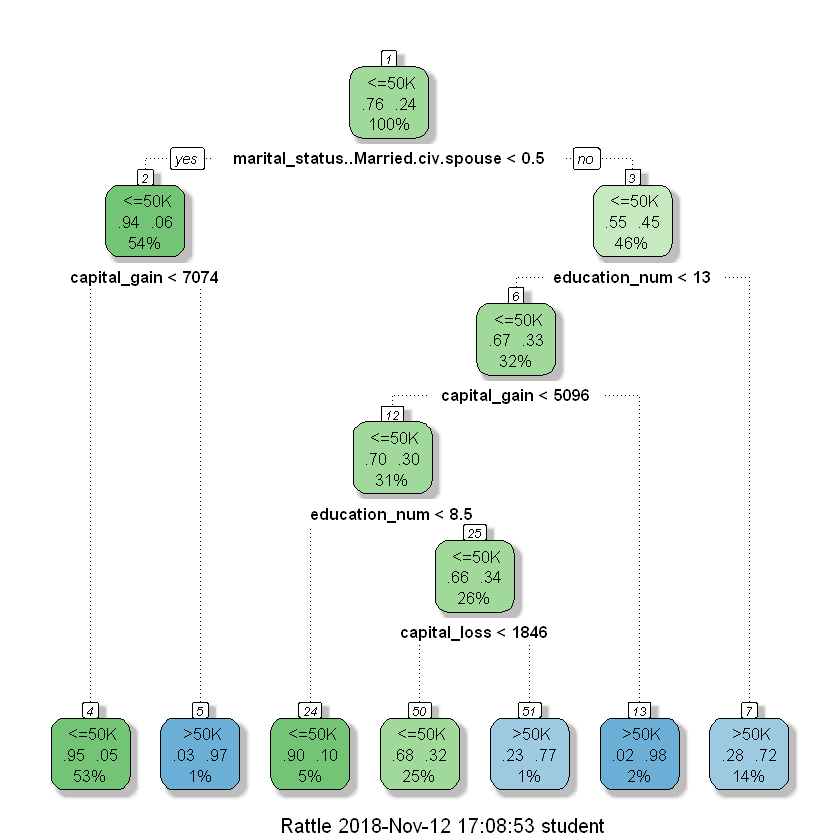

In [14]:
#convert to dataframe
trainData <- data.frame(trainData_mat)
trainData$income <- adult$income


#split data
splitIndex <- createDataPartition(trainData$income, p = .7, list = FALSE, times = 1)
set.seed(2018)
train <- trainData[ splitIndex,]
test <- trainData[-splitIndex,]

#creating tree
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree, test, type = "class")

#plotting tree
library(rattle)
## Rattle: A free graphical interface for data science with R.
## Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
## Type 'rattle()' to shake, rattle, and roll your data.
fancyRpartPlot(mytree)


In [15]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

cm


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   6990  1073
     >50K     426  1279
                                          
               Accuracy : 0.8465          
                 95% CI : (0.8392, 0.8536)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5368          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5438          
            Specificity : 0.9426          
         Pos Pred Value : 0.7501          
         Neg Pred Value : 0.8669          
             Prevalence : 0.2408          
         Detection Rate : 0.1309          
   Detection Prevalence : 0.1745          
      Balanced Accuracy : 0.7432          
                                          
       'Positive' Class :  >50K           
                                          

In [16]:
library(ranger)

model = ranger(income~., data=train)
pred3 = predict(model,data = test)$predictions
cm3 = confusionMatrix(pred3,test$income, positive = " >50K")

cm3



Attaching package: 'ranger'

The following object is masked from 'package:rattle':

    importance



Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   6993   890
     >50K     423  1462
                                          
               Accuracy : 0.8656          
                 95% CI : (0.8587, 0.8723)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6056          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6216          
            Specificity : 0.9430          
         Pos Pred Value : 0.7756          
         Neg Pred Value : 0.8871          
             Prevalence : 0.2408          
         Detection Rate : 0.1497          
   Detection Prevalence : 0.1930          
      Balanced Accuracy : 0.7823          
                                          
       'Positive' Class :  >50K           
                                          

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"

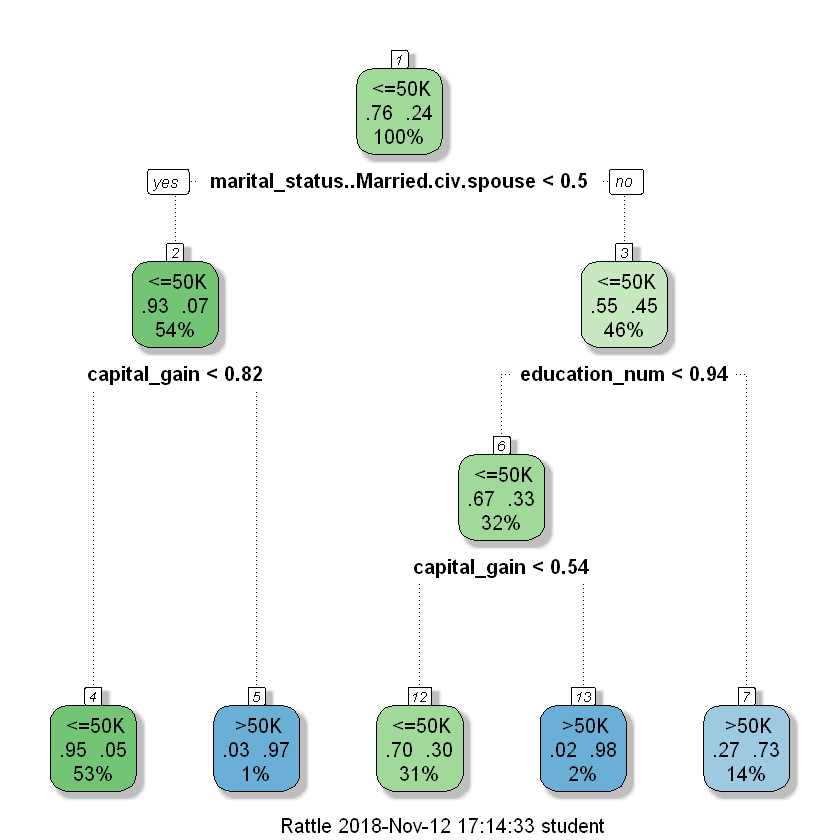

In [18]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")

#change to NA's again
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
}
}
  
}
 ## fixing categorical variables
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor")
{
  adult[,i][is.na(adult[,i])] = unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
}
}

### fixing levels of variables again
##Native Country
levels(adult$`native_country`) = c(" ?", " Asia", " North America", " Asia", " South America", " North America", " North America", " South America", " North America", " Europe", " Europe", " Europe", " Europe", " North America", " North America", " Europe", " North America", " Asia", " Europe", " Asia", " Asia", " Europe", " Europe", " Africa", " Asia", " Asia", " North America", " North America", " North America", " South America", " Asia", " Europe", " Europe", " North America", " Europe", " South America", " Asia", " Asia", " North America", " North America", " Asia", " Europe")
  
# education
levels(adult$education) = c("HS drop out", "HS drop out", "HS drop out", "no HS", "no HS", "no HS", "HS drop out", "2 years of college", "2 years of college", "Bachelors or higher", "Bachelors or higher", "HS-grad", "Bachelors or higher", "no HS", "no HS", "HS-grad")

# occupation 
levels(adult$occupation) = c(" ?", " Management", " Military", " Other", " Management", " Other", " Other", " Other", " Other", " Other", " Specialty", " Other", " Other", " Tech", " Other")

### REPLACING MISSING VALUES WITH MEAN
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "numeric") 
{
  adult[,i][is.na(adult[,i])] = mean(adult[,i])
}
} 
preProcess_missingdata_model <- preProcess(adult)

trainData <- predict(preProcess_missingdata_model, newdata = adult)

#Dummy vars
dummies_model <- dummyVars(income ~ ., data=trainData)
trainData_mat <- predict(dummies_model, newdata = trainData)
## Warning in model.frame.default(Terms, newdata, na.action = na.action, xlev
## = object$lvls): variable 'income' is not a factor
#convert to dataframe
trainData <- data.frame(trainData_mat)
trainData$income <- adult$income

splitIndex <- createDataPartition(trainData$income, p = .7, list = FALSE, times = 1)
set.seed(2018)
train <- trainData[ splitIndex,]
test <- trainData[-splitIndex,]

#creating tree
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree, test, type = "class")

#plotting tree
library(rattle)
fancyRpartPlot(mytree)


In [19]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

cm


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7008  1138
     >50K     408  1214
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8343, 0.8489)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5158          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5162          
            Specificity : 0.9450          
         Pos Pred Value : 0.7485          
         Neg Pred Value : 0.8603          
             Prevalence : 0.2408          
         Detection Rate : 0.1243          
   Detection Prevalence : 0.1661          
      Balanced Accuracy : 0.7306          
                                          
       'Positive' Class :  >50K           
                                          

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"

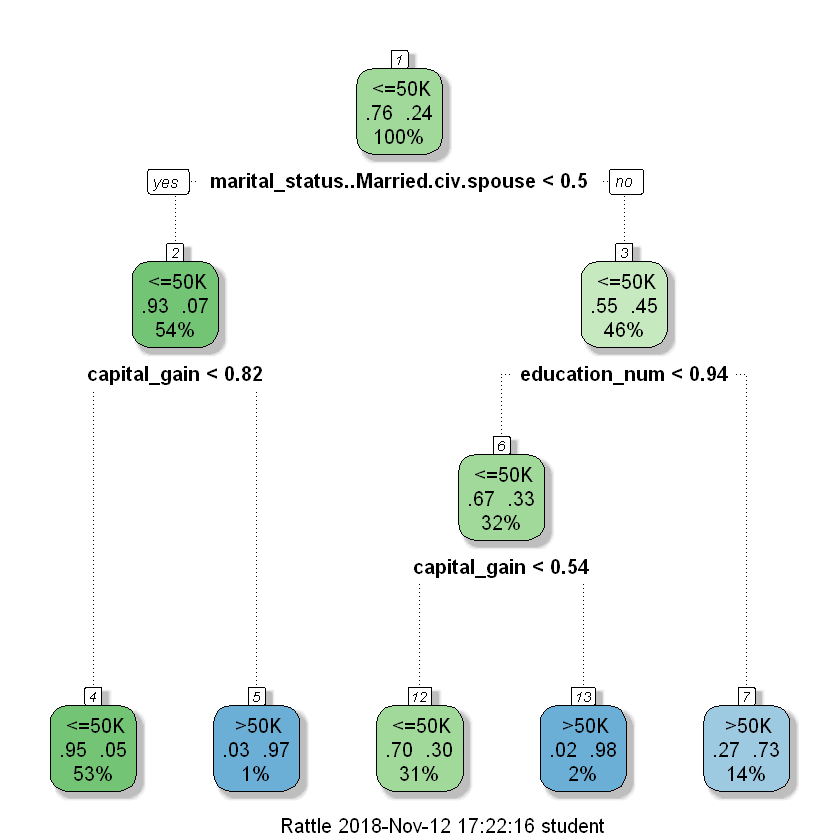

In [20]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")

#change to NA's again
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
}
}
  
}
 ## fixing categorical variables
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor")
{
  adult[,i][is.na(adult[,i])] =  unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
} 
}

### fixing levels of variables again
##Native Country
levels(adult$`native_country`) = c(" ?", " Asia", " North America", " Asia", " South America", " North America", " North America", " South America", " North America", " Europe", " Europe", " Europe", " Europe", " North America", " North America", " Europe", " North America", " Asia", " Europe", " Asia", " Asia", " Europe", " Europe", " Africa", " Asia", " Asia", " North America", " North America", " North America", " South America", " Asia", " Europe", " Europe", " North America", " Europe", " South America", " Asia", " Asia", " North America", " North America", " Asia", " Europe")
  
# education
levels(adult$education) = c("HS drop out", "HS drop out", "HS drop out", "no HS", "no HS", "no HS", "HS drop out", "2 years of college", "2 years of college", "Bachelors or higher", "Bachelors or higher", "HS-grad", "Bachelors or higher", "no HS", "no HS", "HS-grad")

# occupation 
levels(adult$occupation) = c(" ?", " Management", " Military", " Other", " Management", " Other", " Other", " Other", " Other", " Other", " Specialty", " Other", " Other", " Tech", " Other")
preProcess_missingdata_model <- preProcess(adult, method= c("center", "scale"))
trainData <- predict(preProcess_missingdata_model, newdata = adult)

dummies_model <- dummyVars(income ~ ., data=trainData)
trainData_mat <- predict(dummies_model, newdata = trainData)
## Warning in model.frame.default(Terms, newdata, na.action = na.action, xlev
## = object$lvls): variable 'income' is not a factor
#convert to dataframe
trainData <- data.frame(trainData_mat)
trainData$income <- adult$income

splitIndex <- createDataPartition(trainData$income, p = .7, list = FALSE, times = 1)
set.seed(2018)
train <- trainData[ splitIndex,]
test <- trainData[-splitIndex,]

#creating tree
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree, test, type = "class")

#plotting tree
library(rattle)
fancyRpartPlot(mytree)


In [21]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

cm


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7008  1138
     >50K     408  1214
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8343, 0.8489)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5158          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5162          
            Specificity : 0.9450          
         Pos Pred Value : 0.7485          
         Neg Pred Value : 0.8603          
             Prevalence : 0.2408          
         Detection Rate : 0.1243          
   Detection Prevalence : 0.1661          
      Balanced Accuracy : 0.7306          
                                          
       'Positive' Class :  >50K           
                                          

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"

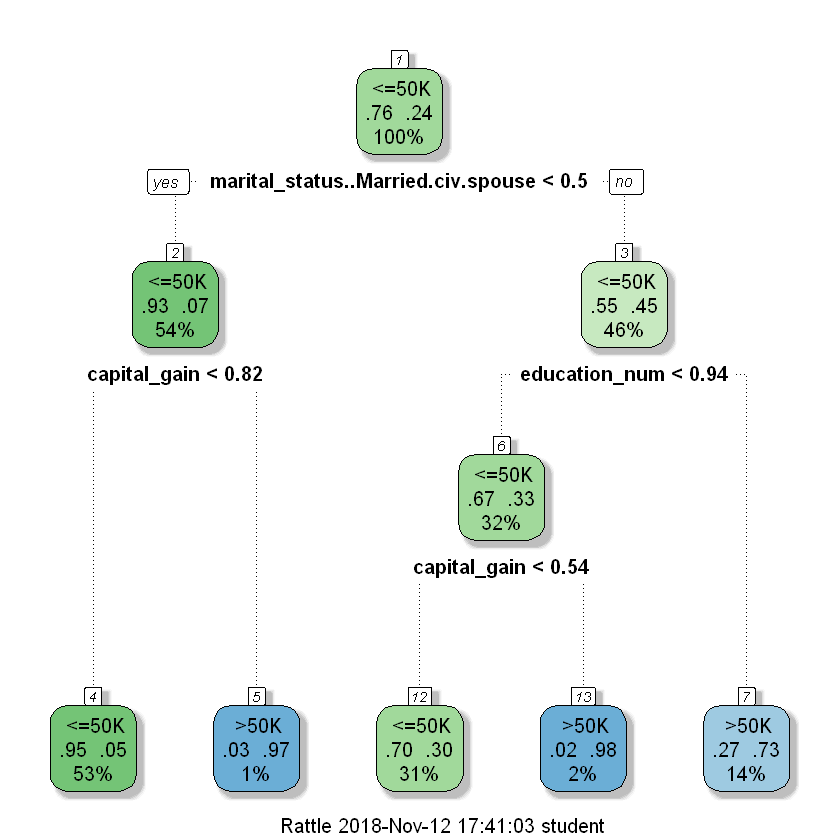

In [22]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")

#change to NA's again
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
}
}
  
}
 ## fixing categorical variables
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor")
{
  adult[,i][is.na(adult[,i])] =  unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
} 
}

### fixing levels of variables again
##Native Country
levels(adult$`native_country`) = c(" ?", " Asia", " North America", " Asia", " South America", " North America", " North America", " South America", " North America", " Europe", " Europe", " Europe", " Europe", " North America", " North America", " Europe", " North America", " Asia", " Europe", " Asia", " Asia", " Europe", " Europe", " Africa", " Asia", " Asia", " North America", " North America", " North America", " South America", " Asia", " Europe", " Europe", " North America", " Europe", " South America", " Asia", " Asia", " North America", " North America", " Asia", " Europe")
  
# education
levels(adult$education) = c("HS drop out", "HS drop out", "HS drop out", "no HS", "no HS", "no HS", "HS drop out", "2 years of college", "2 years of college", "Bachelors or higher", "Bachelors or higher", "HS-grad", "Bachelors or higher", "no HS", "no HS", "HS-grad")

# occupation 
levels(adult$occupation) = c(" ?", " Management", " Military", " Other", " Management", " Other", " Other", " Other", " Other", " Other", " Specialty", " Other", " Other", " Tech", " Other")
dummies_model <- dummyVars(income ~ ., data=trainData)
trainData_mat <- predict(dummies_model, newdata = trainData)
## Warning in model.frame.default(Terms, newdata, na.action = na.action, xlev
## = object$lvls): variable 'income' is not a factor
preProcess_missingdata_model <- preProcess(adult, method= "BoxCox")
trainData <- predict(preProcess_missingdata_model, newdata = adult)

#convert to dataframe
trainData <- data.frame(trainData_mat)
trainData$income <- adult$income

splitIndex <- createDataPartition(trainData$income, p = .7, list = FALSE, times = 1)
set.seed(2018)
train <- trainData[ splitIndex,]
test <- trainData[-splitIndex,]

#creating tree
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree, test, type = "class")

#plotting tree
library(rattle)
fancyRpartPlot(mytree)


In [23]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

cm


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7008  1138
     >50K     408  1214
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8343, 0.8489)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5158          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5162          
            Specificity : 0.9450          
         Pos Pred Value : 0.7485          
         Neg Pred Value : 0.8603          
             Prevalence : 0.2408          
         Detection Rate : 0.1243          
   Detection Prevalence : 0.1661          
      Balanced Accuracy : 0.7306          
                                          
       'Positive' Class :  >50K           
                                          

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'income' is not a factor"

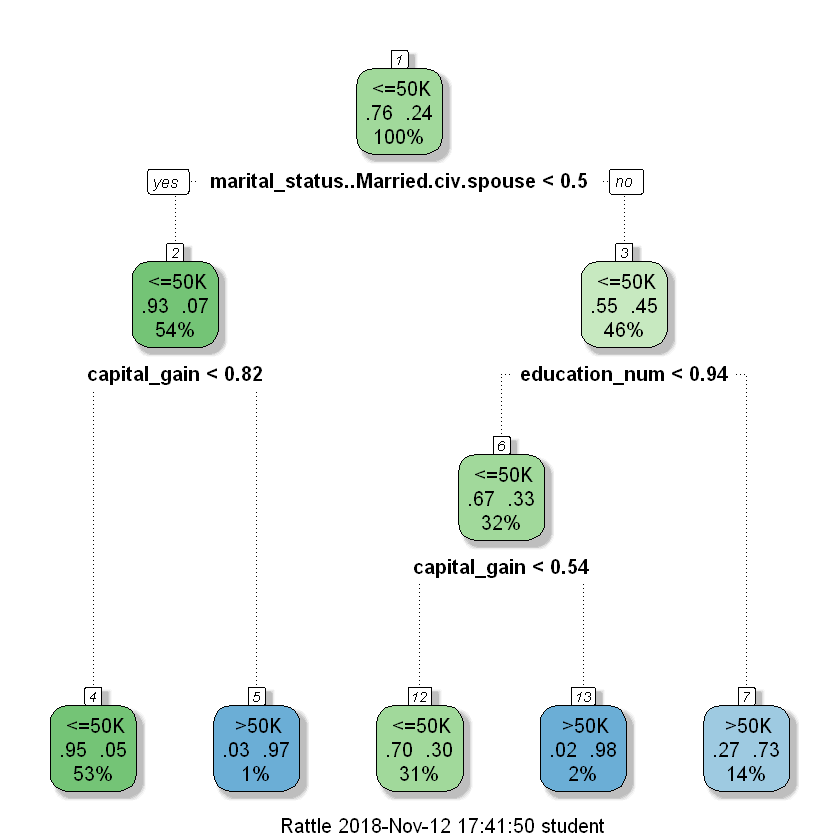

In [24]:
adult <- read.csv("C:/Users/student/Desktop/adult.csv", header = FALSE)
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss","hours_per_week", "native_country","income")

#change to NA's again
for (i in 1:ncol(adult))
{ for (j in 1:nrow(adult))
{ if(adult[j,i] == " ?")
{
  adult[j,i] = NA
} 
}
  
}
 ## fixing categorical variables
for (i in 1:ncol(adult))
{ if(class(adult[,i]) == "factor") 
{
  adult[,i][is.na(adult[,i])] = unique(adult[,i])[which.max(tabulate(match(adult,unique(adult[,i]))))]
}
}

### imputing median
library(caret)
preProcess_missingdata_model <- preProcess(adult, method='medianImpute')

trainData <- predict(preProcess_missingdata_model, newdata = adult)
preProcess_missingdata_model <- preProcess(adult, method= c("center", "scale"))
trainData <- predict(preProcess_missingdata_model, newdata = adult)

#encoding dummy vars
dummies_model <- dummyVars(income ~ ., data=trainData)
trainData_mat <- predict(dummies_model, newdata = trainData)
## Warning in model.frame.default(Terms, newdata, na.action = na.action, xlev
## = object$lvls): variable 'income' is not a factor
#convert to dataframe
trainData <- data.frame(trainData_mat)
trainData$income <- adult$income

splitIndex <- createDataPartition(trainData$income, p = .7, list = FALSE, times = 1)
set.seed(2018)
train <- trainData[ splitIndex,]
test <- trainData[-splitIndex,]

#creating tree
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree, test, type = "class")

#plotting tree
library(rattle)
fancyRpartPlot(mytree)


In [25]:
cm=confusionMatrix(data=pred, reference =test$income, positive = " >50K")

cm


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7008  1138
     >50K     408  1214
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8343, 0.8489)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5158          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5162          
            Specificity : 0.9450          
         Pos Pred Value : 0.7485          
         Neg Pred Value : 0.8603          
             Prevalence : 0.2408          
         Detection Rate : 0.1243          
   Detection Prevalence : 0.1661          
      Balanced Accuracy : 0.7306          
                                          
       'Positive' Class :  >50K           
                                          